# Statistics of Hypothesis Testing Review

An informal treatment of the statistics of hypothesis testing, including:

- Comparing groups (experimental and control)
- t-statistic and distribution
- confidence intervals
- significance and power

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### Experiment

**Group A:** group A is using the old version of our app. 

**Group B:** group B is using the app with a new feature added.

**Measurement:** How many hours are people using the app in a month.

In [3]:
import scipy.stats as stats

In [94]:
group_A_hr_dist = stats.norm(30, 5)
group_B_hr_dist = stats.norm(31, 5)

In [95]:
group_A_hr_dist.rvs(10)

array([ 32.91847605,  23.62548907,  27.21518446,  31.62683111,
        26.51385798,  31.66666418,  26.32088438,  35.10714876,
        33.43286424,  36.22273839])

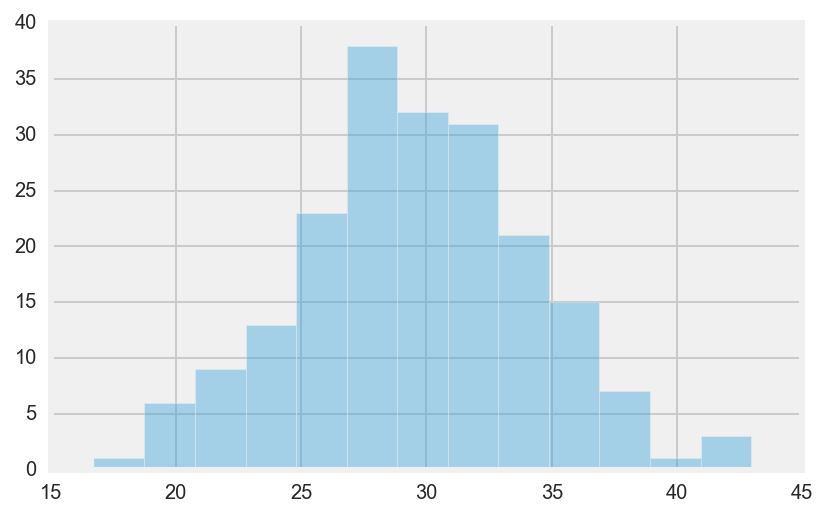

In [96]:
sns.distplot(group_A_hr_dist.rvs(200), kde=False)

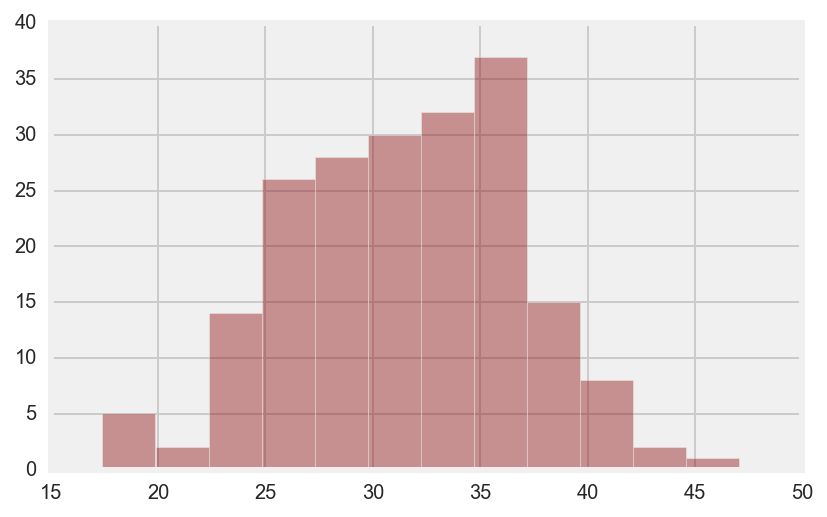

In [97]:
sns.distplot(group_B_hr_dist.rvs(200), kde=False, color='darkred')

In [98]:
n = 100
A_mean_hrs = [np.mean(group_A_hr_dist.rvs(n)) for i in range(1000)]
B_mean_hrs = [np.mean(group_B_hr_dist.rvs(n)) for i in range(1000)]
AB_diffs = [b-a for a,b in zip(A_mean_hrs, B_mean_hrs)]

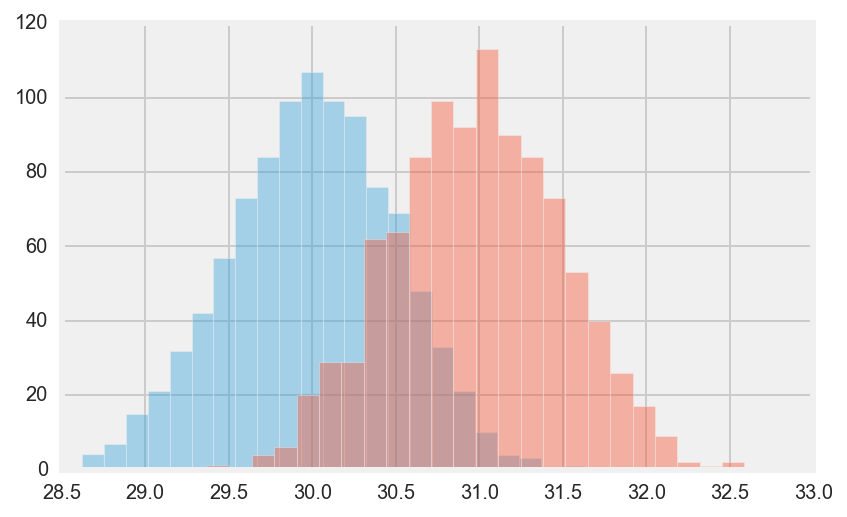

In [99]:
ax = sns.distplot(A_mean_hrs, kde=False)
sns.distplot(B_mean_hrs, kde=False, ax=ax)

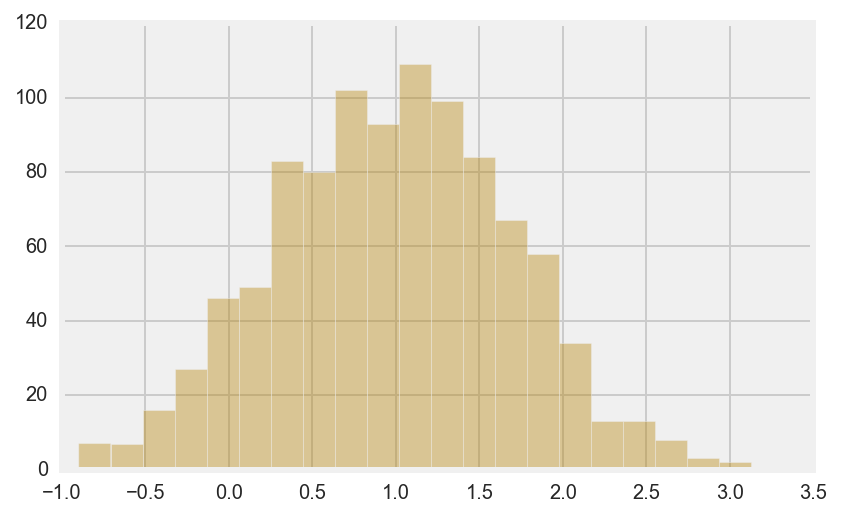

In [100]:
ax = sns.distplot(AB_diffs, kde=False, color='darkgoldenrod')

In [101]:
print 1. - float(len([x for x in AB_diffs if x > 0]))/len(AB_diffs)

0.086


### Standard error of the mean

### $$ s_{\bar{x}} = \frac{s}{\sqrt{n}} $$

In [45]:
n = 100
group_A_sample = group_A_hr_dist.rvs(n)
gA_std = np.std(group_A_sample)
gA_mean = np.mean(group_A_sample)
print gA_mean
print gA_std / np.sqrt(n)

25.2845293932
2.57664903758


### Four interacting components

1. Size of difference between groups (size of effect)
2. Sample size
3. Standard deviation (of measurements/population)
4. Desired significance level.

In [102]:
bank = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-4/datasets/bank_loans/bank-full.csv',
                   sep=';')

In [104]:
age = bank.age.values

In [103]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


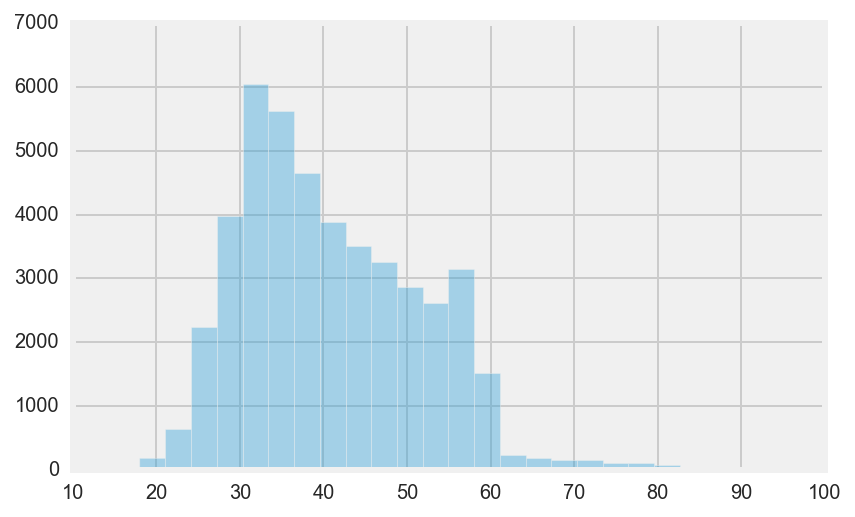

In [108]:
sns.distplot(age, kde=False, bins=25)

#### Null hypothesis:

Mean age is 30.

#### Alternative hypothesis:

Mean age is not 30

In [129]:
sample_ages = np.random.choice(age, replace=False, size=5)

In [130]:
sample_mean = np.mean(sample_ages)
print sample_mean

46.2


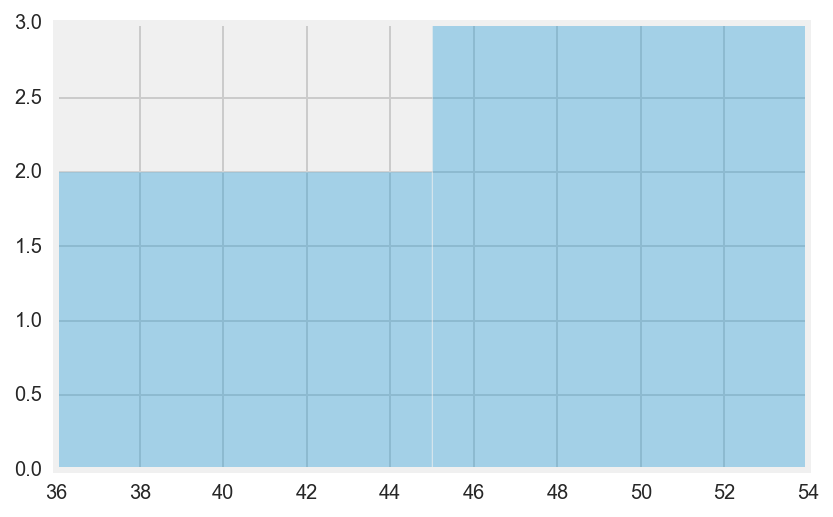

In [131]:
sns.distplot(sample_ages, kde=False)

In [132]:
null_mean = 30
n = 5

### Z-score

Z value is measured in standard deviations on our null hypothesis mean distribution.

### $$ Z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}} $$

In [133]:
age_zscore = (sample_mean - null_mean) / (np.std(sample_ages)/np.sqrt(n))
print age_zscore

5.74482533317


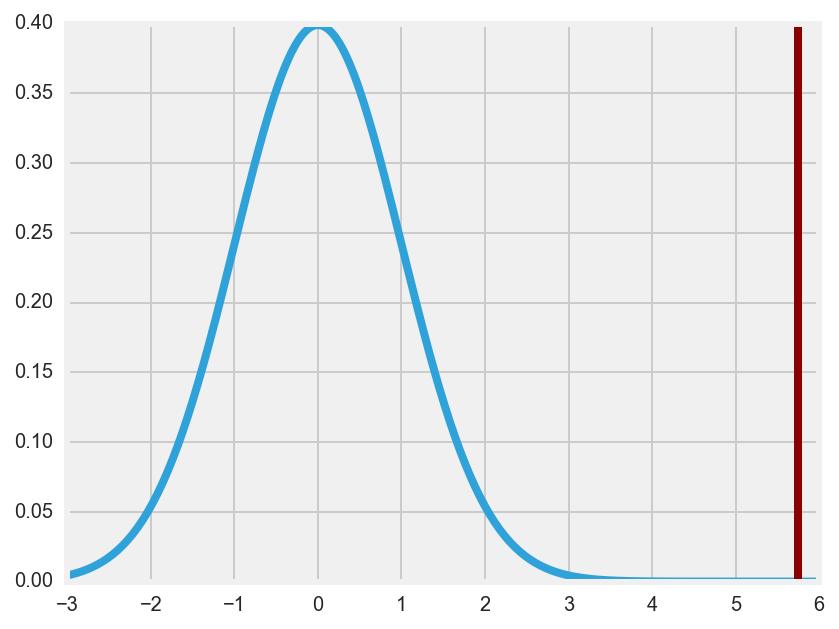

In [134]:
z_distribution = stats.norm(0,1)
x = np.linspace(-3, 6, 300)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x, z_distribution.pdf(x), lw=4)
ax.axvline(age_zscore, lw=4, color='darkred')
plt.show()

In [115]:
null_dist = stats.norm(30, np.std(sample_ages)/np.sqrt(n))

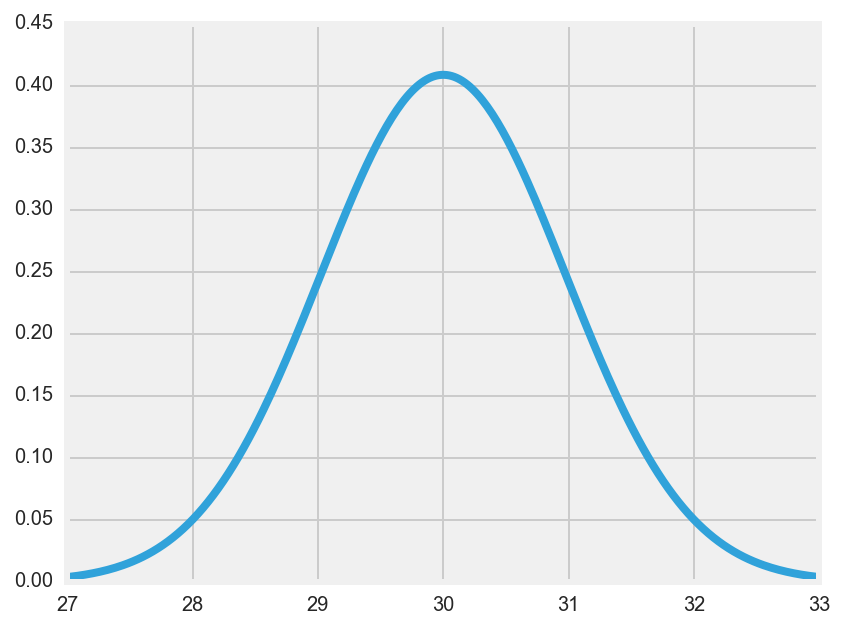

In [118]:
x = np.linspace(27, 33, 300)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x, null_dist.pdf(x), lw=4)
plt.show()

In [135]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [137]:
married = np.random.choice(bank[bank.marital == 'married'].age.values, size=50)
single = np.random.choice(bank[bank.marital == 'single'].age.values, size=50)

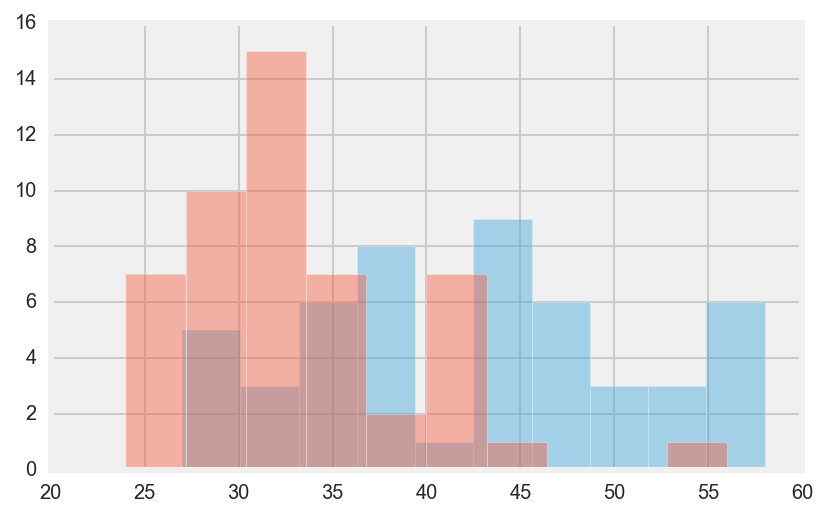

In [139]:
ax = sns.distplot(married, kde=False, bins=10)
sns.distplot(single, kde=False, ax=ax, bins=10)

#### Null hypothesis: difference in mean age is 0

In [140]:
age_diff = np.mean(married) - np.mean(single)
age_diff

9.1400000000000006

### Z-score, two sample


### $$ Z = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

In [141]:
age_diff_z = age_diff / np.sqrt((np.var(married)/50) + (np.var(single)/50))

In [142]:
age_diff_z

6.1232882491993692

In [145]:
1 - z_distribution.cdf(age_diff_z)

4.5831827222286847e-10

In [151]:
degrees_freedom = 50 + 50 -2
t_distribution = stats.t

In [155]:
1 - t_distribution.cdf(age_diff_z, 4)

0.0018015880684353336

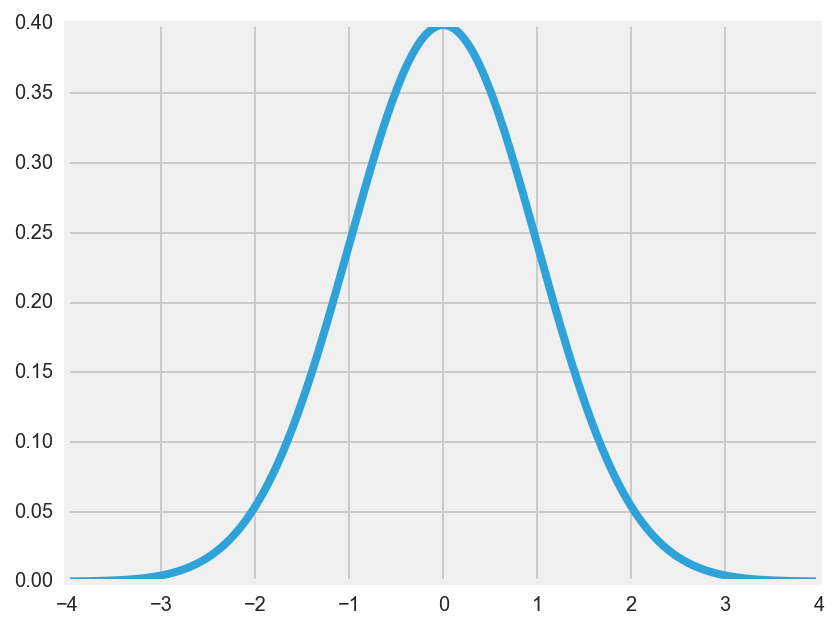

In [149]:
z_distribution = stats.norm(0,1)
x = np.linspace(-4, 4, 300)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x, z_distribution.pdf(x), lw=4)
#ax.axvline(age_zscore, lw=4, color='darkred')
plt.show()

In [156]:
sem = np.sqrt((np.var(married)/50) + (np.var(single)/50))
sem

1.4926620515039566

In [157]:
age_diff + sem

10.632662051503956

In [158]:
age_diff - sem

7.6473379484960438

alpha = 0.05

### $$ P(-Z_{\alpha/2} < \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} < Z_{\alpha/2})  = 1 - \alpha$$

### $$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} $$

3.2905267314919255

In [167]:
upper = 2.57*sem
lower = -2.57*sem
print lower+age_diff, age_diff, upper+age_diff

5.30385852763 9.14 12.9761414724


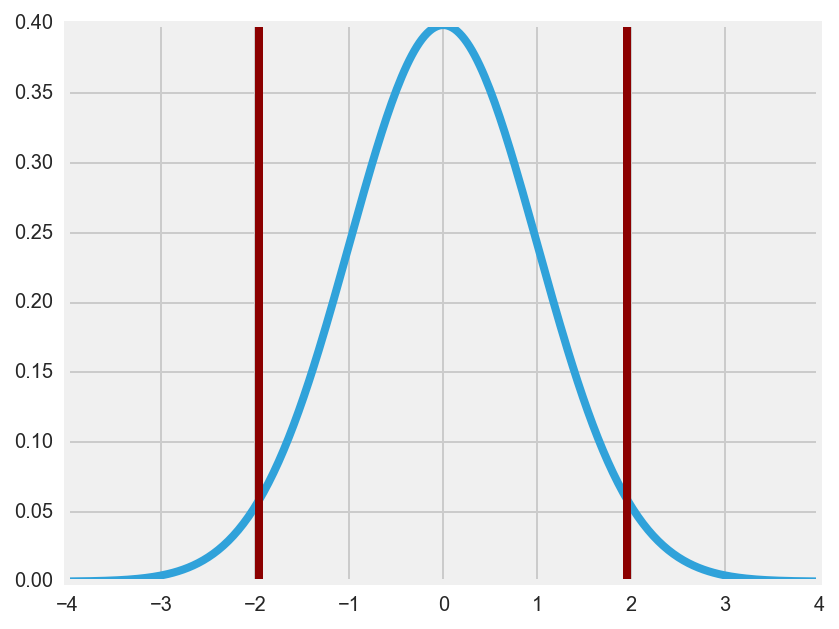

In [161]:
z_distribution = stats.norm(0,1)
x = np.linspace(-4, 4, 300)
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x, z_distribution.pdf(x), lw=4)
ax.axvline(-1.96, lw=4, color='darkred')
ax.axvline(1.96, lw=4, color='darkred')
plt.show()